**Import necessary Lib**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


**Read and understand our Data**

In [ ]:
housing = pd.read_csv("Housing.csv")
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing["price"].describe()

,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


# *the Correlations*

In [ ]:
house_num = housing.select_dtypes(include = ['float64','int64'])
house_num_corr = house_num.corr()['price'][1:] # Exclude self-correlation
top_features = house_num_corr[abs(house_num_corr) > 0.5].sort_values(ascending=False) #Display pearsons correlations coefficient greater than 0.5
print("There is {} strongly correlated values with Price: \n{}".format(len(top_features), top_features))

There is 2 strongly correlated values with Price: 
area         0.535997
bathrooms    0.517545
Name: price, dtype: float64


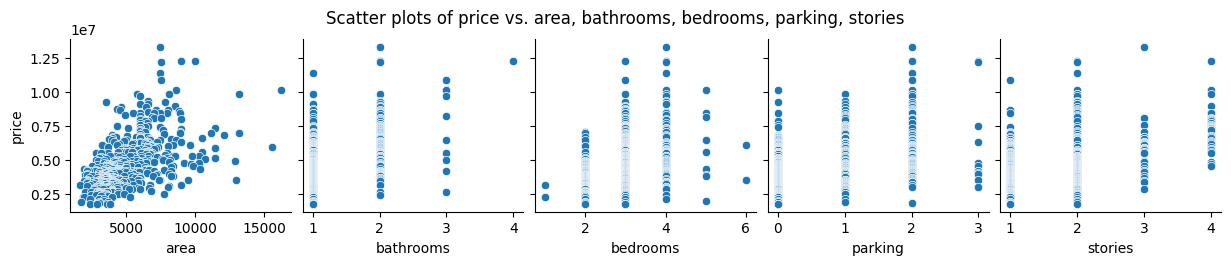

In [ ]:
feature_columns = house_num.columns.difference(['price'])  # Exclude 'price'

# Create pair plots in chunks of 5 features
for i in range(0, len(feature_columns), 5):
    subset_columns = feature_columns[i:i+5]

    # Create a subset DataFrame including 'price' and the selected feature columns
    subset_df = house_num[['price'] + list(subset_columns)]

    # Plot pairwise scatter plots
    sns.pairplot(data=subset_df,
                 x_vars=subset_columns,
                 y_vars=['price'])

    # Add a title to the plot
    plt.suptitle(f'Scatter plots of price vs. {", ".join(subset_columns)}', y=1.02)

    # Display the plot
    plt.show()

# **Handling the duplicated**

In [ ]:
duplicate = housing[housing.duplicated()]
duplicate

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [ ]:
duplicated_remove = housing.drop_duplicates()
duplicated_remove

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
housing.index.is_unique

True

# **Handling The Missing Values**

**finding the missing values**

Text(0.5, 1.0, 'Total Missing Values')

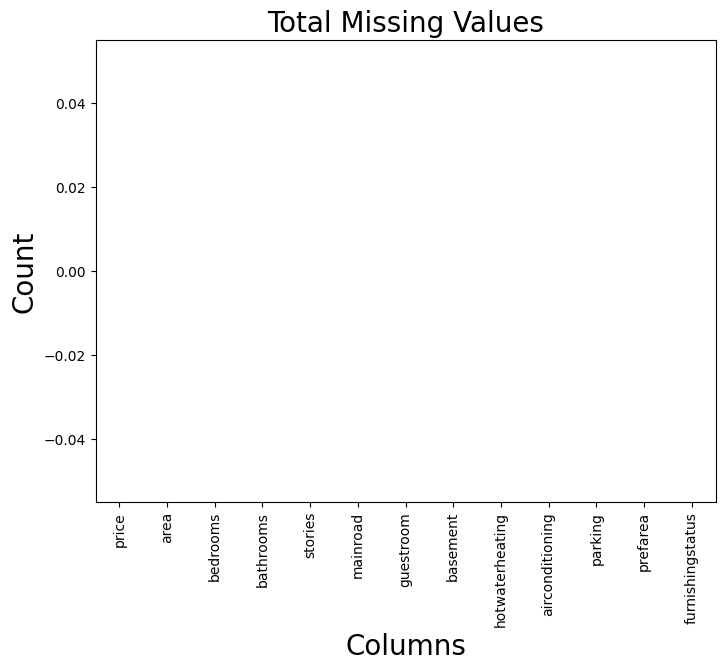

In [ ]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize= (8,6), fontsize=10)

plt.xlabel("Columns", fontsize=20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize=20)

many options to use : drop the missing values

In [ ]:
#housing.dropna(subset=[""]) #include the attribute name for the attribute that has missing values

In [ ]:
#housing.drop("", axis=1) #include attribute for the null values

In [ ]:
#we can replace the missing values with mean, median,zero..
# median = housing[""].median()
# median
# housing[""].fillna(median, inplace = True)

In [ ]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# **Handling the outliers**

Uni-variate Analysis : Box plots method

<Axes: xlabel='price'>

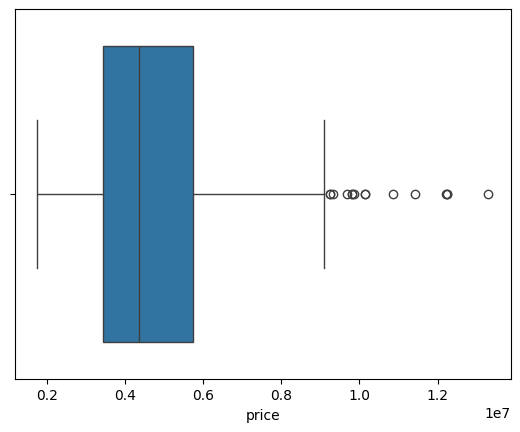

In [ ]:
sns.boxplot(x=housing['price'])

<Axes: xlabel='area'>

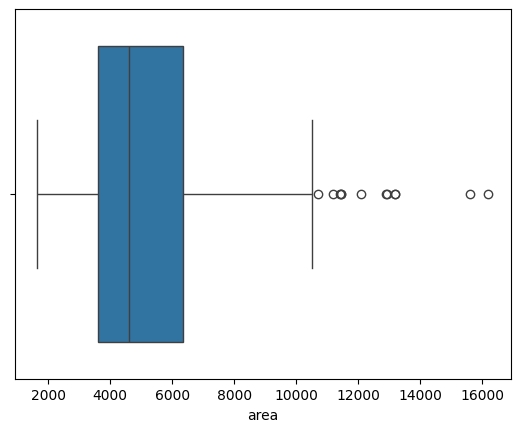

In [ ]:
sns.boxplot(x=housing['area'])

Bi-Variate Analysis

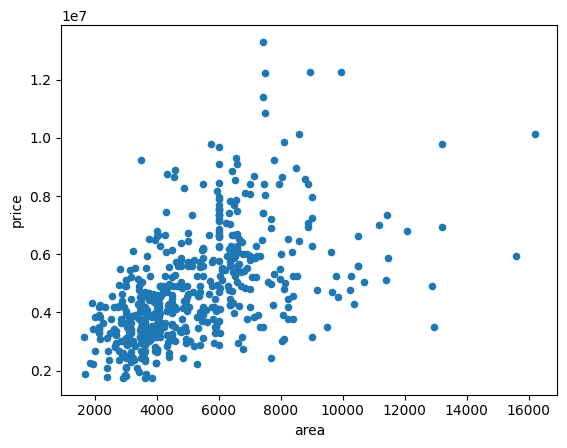

In [ ]:
price_area = housing.plot.scatter(x='area',
                                  y='price')

Deleting the outliers

In [ ]:
housing.sort_values(by= 'area', ascending=False)[:2] #sort all of the area values and select only the last two.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


In [ ]:
#remove these two rows
outliers_dropped = housing.drop(housing.index[[7,125]])

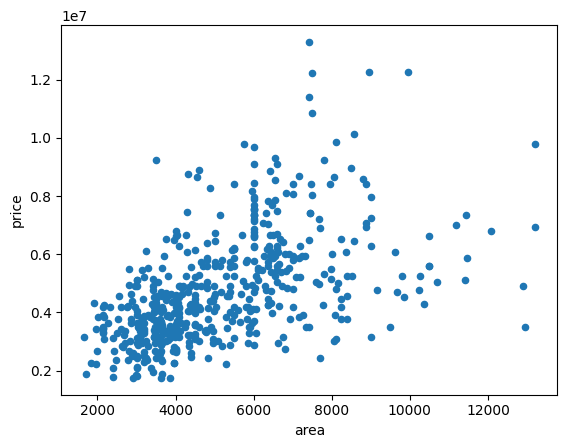

In [ ]:
new_plot = outliers_dropped.plot.scatter(x='area', y='price')

In [ ]:
price_parking = housing.groupby('parking')['price'].mean().reset_index(name ="price").round(2)
price_parking

,parking,price
0,0,4136016.72
1,1,5190388.89
2,2,5896328.15
3,3,5867166.67


In [ ]:
fig = px.line(price_parking,
              x="parking", y="price"
              )
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="House Price per Parking",
    xaxis_title="Parking",
    yaxis_title="Price"
)
fig.show()

# **Log Transformation**

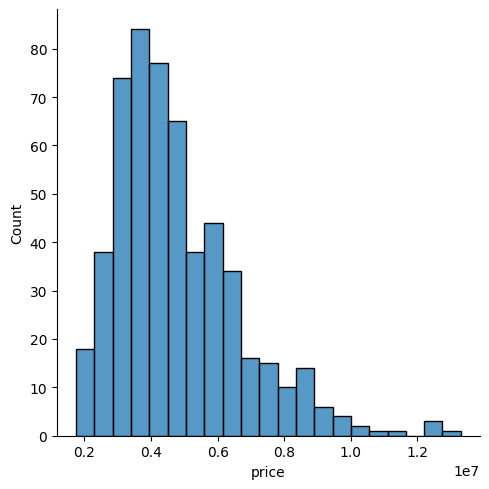

In [ ]:
untransformed = sns.displot(housing['price'])

In [ ]:
print("skewness: %f" % housing['price'].skew())

skewness: 1.212239


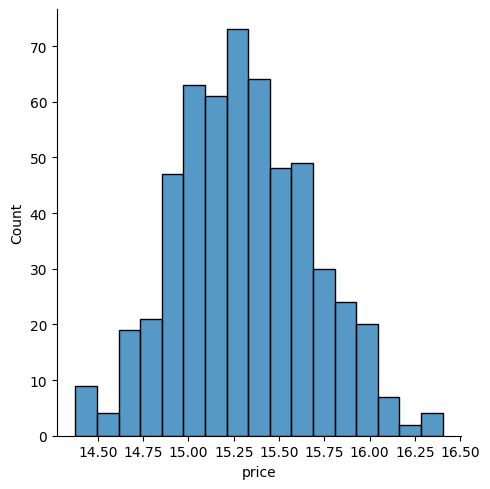

In [ ]:
log_transformed = np.log(housing['price'])
transformed = sns.displot(log_transformed)

In [ ]:
print("skewness: %f" % log_transformed.skew())

skewness: 0.140863


# **Square root transformation**

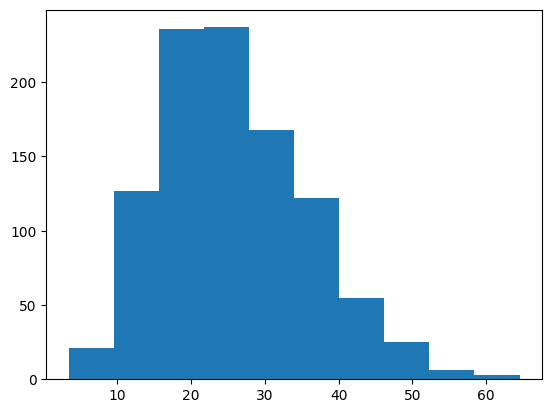

In [ ]:
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data
data = plot_square_normal_data()

(array([  6.,  13.,  78., 155., 235., 226., 165.,  88.,  28.,   6.]),
 array([1.8401577 , 2.45940179, 3.07864587, 3.69788996, 4.31713404,
        4.93637813, 5.55562221, 6.1748663 , 6.79411039, 7.41335447,
        8.03259856]),
 <BarContainer object of 10 artists>)

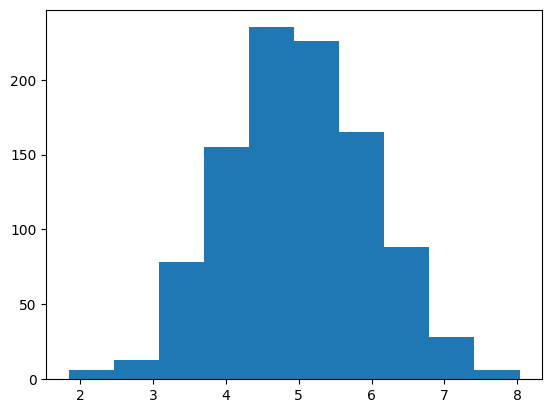

In [ ]:
plt.hist(np.sqrt(data))

# **Box Cox Transformation**

In [ ]:
from scipy.stats import boxcox

In [ ]:
bc_result = boxcox(housing['price'])
boxcox_price = bc_result[0]
lam = bc_result[1]
lam

-0.13464661287601734

<Axes: >

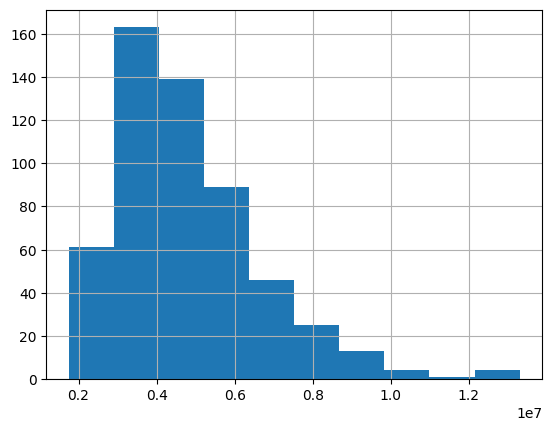

In [ ]:
housing['price'].hist()

(array([  9.,  23.,  47., 100., 112.,  98.,  87.,  42.,  21.,   6.]),
 array([6.35483409, 6.38045208, 6.40607008, 6.43168807, 6.45730606,
        6.48292406, 6.50854205, 6.53416004, 6.55977804, 6.58539603,
        6.61101403]),
 <BarContainer object of 10 artists>)

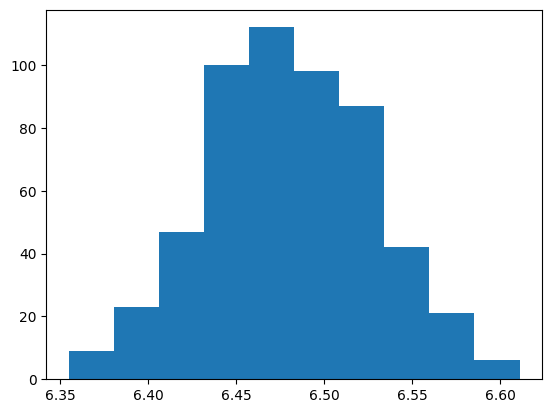

In [ ]:
plt.hist(boxcox_price)

# **Feature Scaling**
Normalize the data

In [ ]:
norm_data = MinMaxScaler().fit_transform(house_num)
norm_data
x_norm = house_num.drop(columns=['price'])
y_norm = house_num['price']
x_normalized = MinMaxScaler().fit_transform(x_norm)
# we have to reshape the y_norm because its 1d
y_normalized = y_norm.values.reshape(-1,1)
y_normalized = MinMaxScaler().fit_transform(y_normalized).ravel()

Standardize the data

In [ ]:
# Standardize features
x = house_num.drop(columns=['price'])
y = house_num['price']

scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# Since `y` is a 1D array, we need to reshape it
y_standardized = y.values.reshape(-1, 1)
y_standardized = scaler.fit_transform(y_standardized).ravel()

# **Machine learning Model**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y_standardized, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
predictions= model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

0.5847528902280613


Mean Absolute Error: 0.5677953130884642
R-squared: 0.5568748573522613
Root Mean Squared Error: 0.7646913692647912


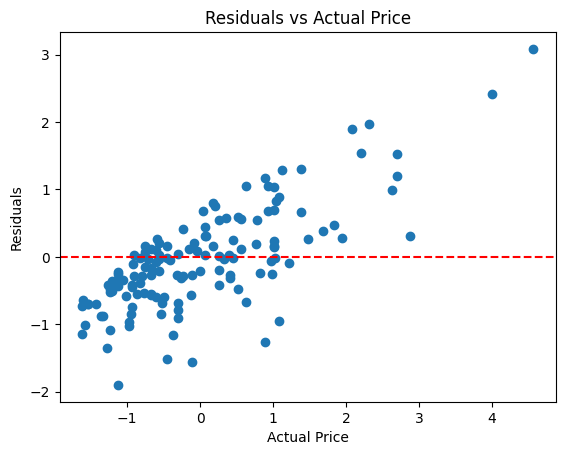

In [ ]:
# Calculate additional metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

# Plot residuals
plt.scatter(y_test, y_test - predictions)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Price')
plt.show()